# Import libs

In [1]:
!pip install torch 
import torch

!pip install h5py
!pip install typing-extensions
!pip install wheel
!pip install docling
from docling.document_converter import DocumentConverter, PdfFormatOption
from docling.datamodel.base_models import InputFormat
from docling.datamodel.pipeline_options import PdfPipelineOptions, TableFormerMode


In [2]:
print(torch.version.cuda)  # Check if CUDA version is detected
print(torch.cuda.is_available())  # Should return True if everything is set up

None
False


# Pipeline Options

In [3]:
pipeline_options = PdfPipelineOptions()
pipeline_options.do_ocr = True
pipeline_options.do_table_structure = True
pipeline_options.table_structure_options.do_cell_matching = True
pipeline_options.table_structure_options.mode = TableFormerMode.ACCURATE


# Convert

In [6]:
source = "AIG.pdf"  # document per local path or URL

In [7]:
doc_converter = DocumentConverter(
    format_options={InputFormat.PDF: PdfFormatOption(pipeline_options=pipeline_options)}
)

result = doc_converter.convert(source)

print(result.document.export_to_markdown())

<!-- image -->

AIG  Travel  is  a  member  company  of  American  International  Group,  Inc.,  and  Travel  Guard®  is  the marketing name for its portfolio of travel insurance and travel-related services, including 24/7 travel assistance, emergency medical and security services. AIG Travel offers the industry's most complete array of 24/7 worldwide and multilingual travel assistance services through an international network of full-service contact centres. Globally, AIG Travel covers 20+ million travellers each year.

## Why Travel Guard

<!-- image -->

<!-- image -->

<!-- image -->

<!-- image -->

## COVID-19 Cover

AIG covers up to S$300,000 in medical overseas, overseas quarantine allowance of up to 14 days and travel inconvenience benefits as a result of COVID-19 diagnosis.

## Reliable and responsive claims

We pay S$30,000 in travel claims every working day. File online or call our claims hotline - our experts are ready to assist you.

## Highest overseas medical coverage



# Manually inspecting output (income_travel_insurance_2024)

### Section 3 missing, 11, 12, 13, 14, 15 got screwed up:

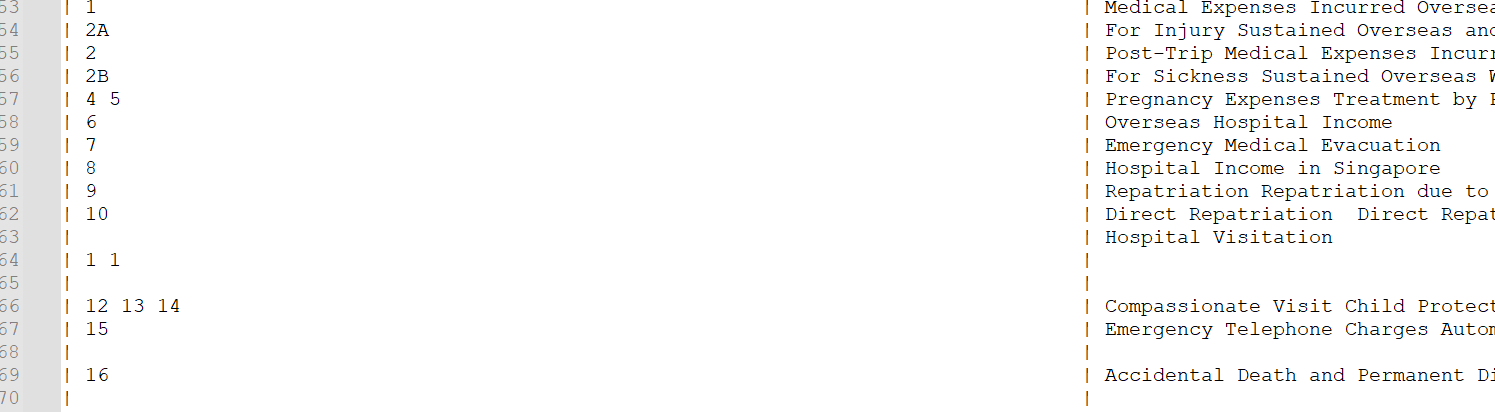

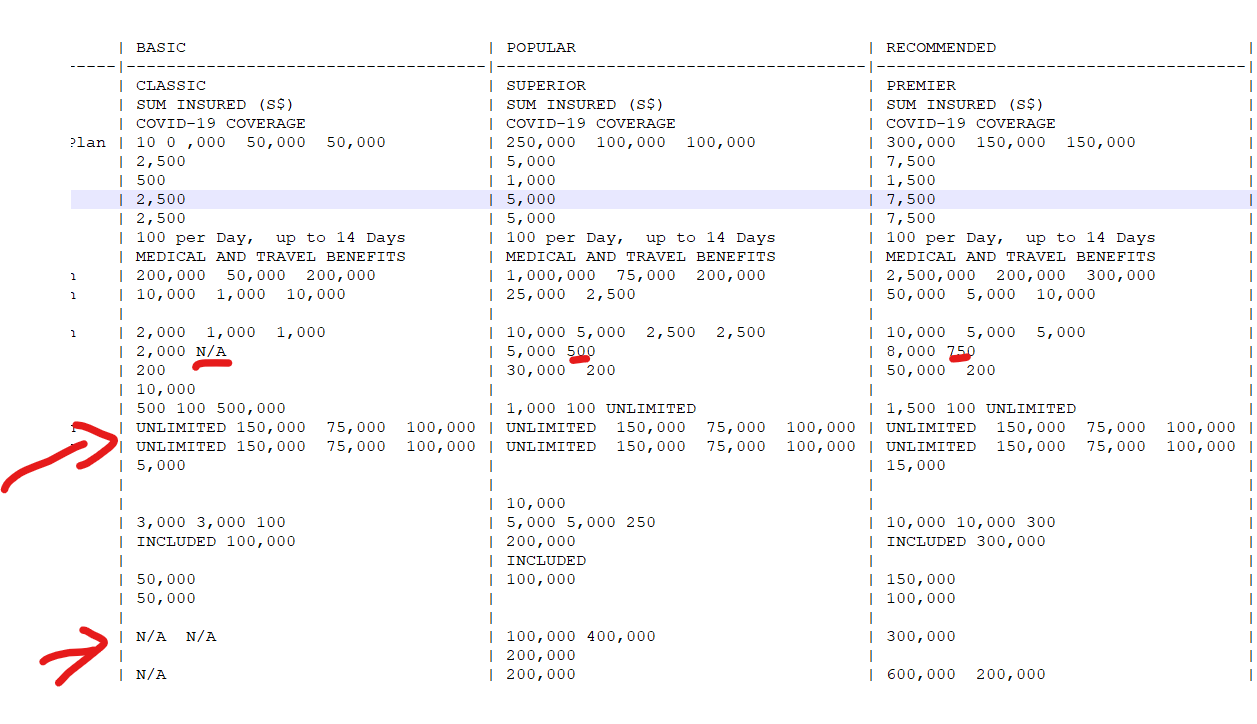

Section 3 went missing, 4 and 5 collapse into 1 row, 11, 12, 13, 14, 15 do not match the source

## Save to local dir

In [30]:
with open("AIG_TravelGuard.txt", "w", encoding="utf-8") as file:
    file.write(result.document.export_to_markdown())